In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

# 1a

In [2]:
expr = np.loadtxt("LUNG.txt")

In [3]:
genes = pd.read_csv("LUNG_gene_annot.txt", sep = "\t")

In [4]:
expr = expr - np.mean(expr, axis = 0)

In [5]:
expr_cov = np.cov(expr.T)

In [6]:
start = time.time()
expr_egi = np.linalg.eig(expr_cov)
end = time.time()
print(end - start)

853.3277161121368


In [19]:
expre_eig_val = expr_egi[0]
expre_eig_vector = expr_egi[1]

In [20]:
expre_eig_val_list = sorted(expre_eig_val,reverse=True)

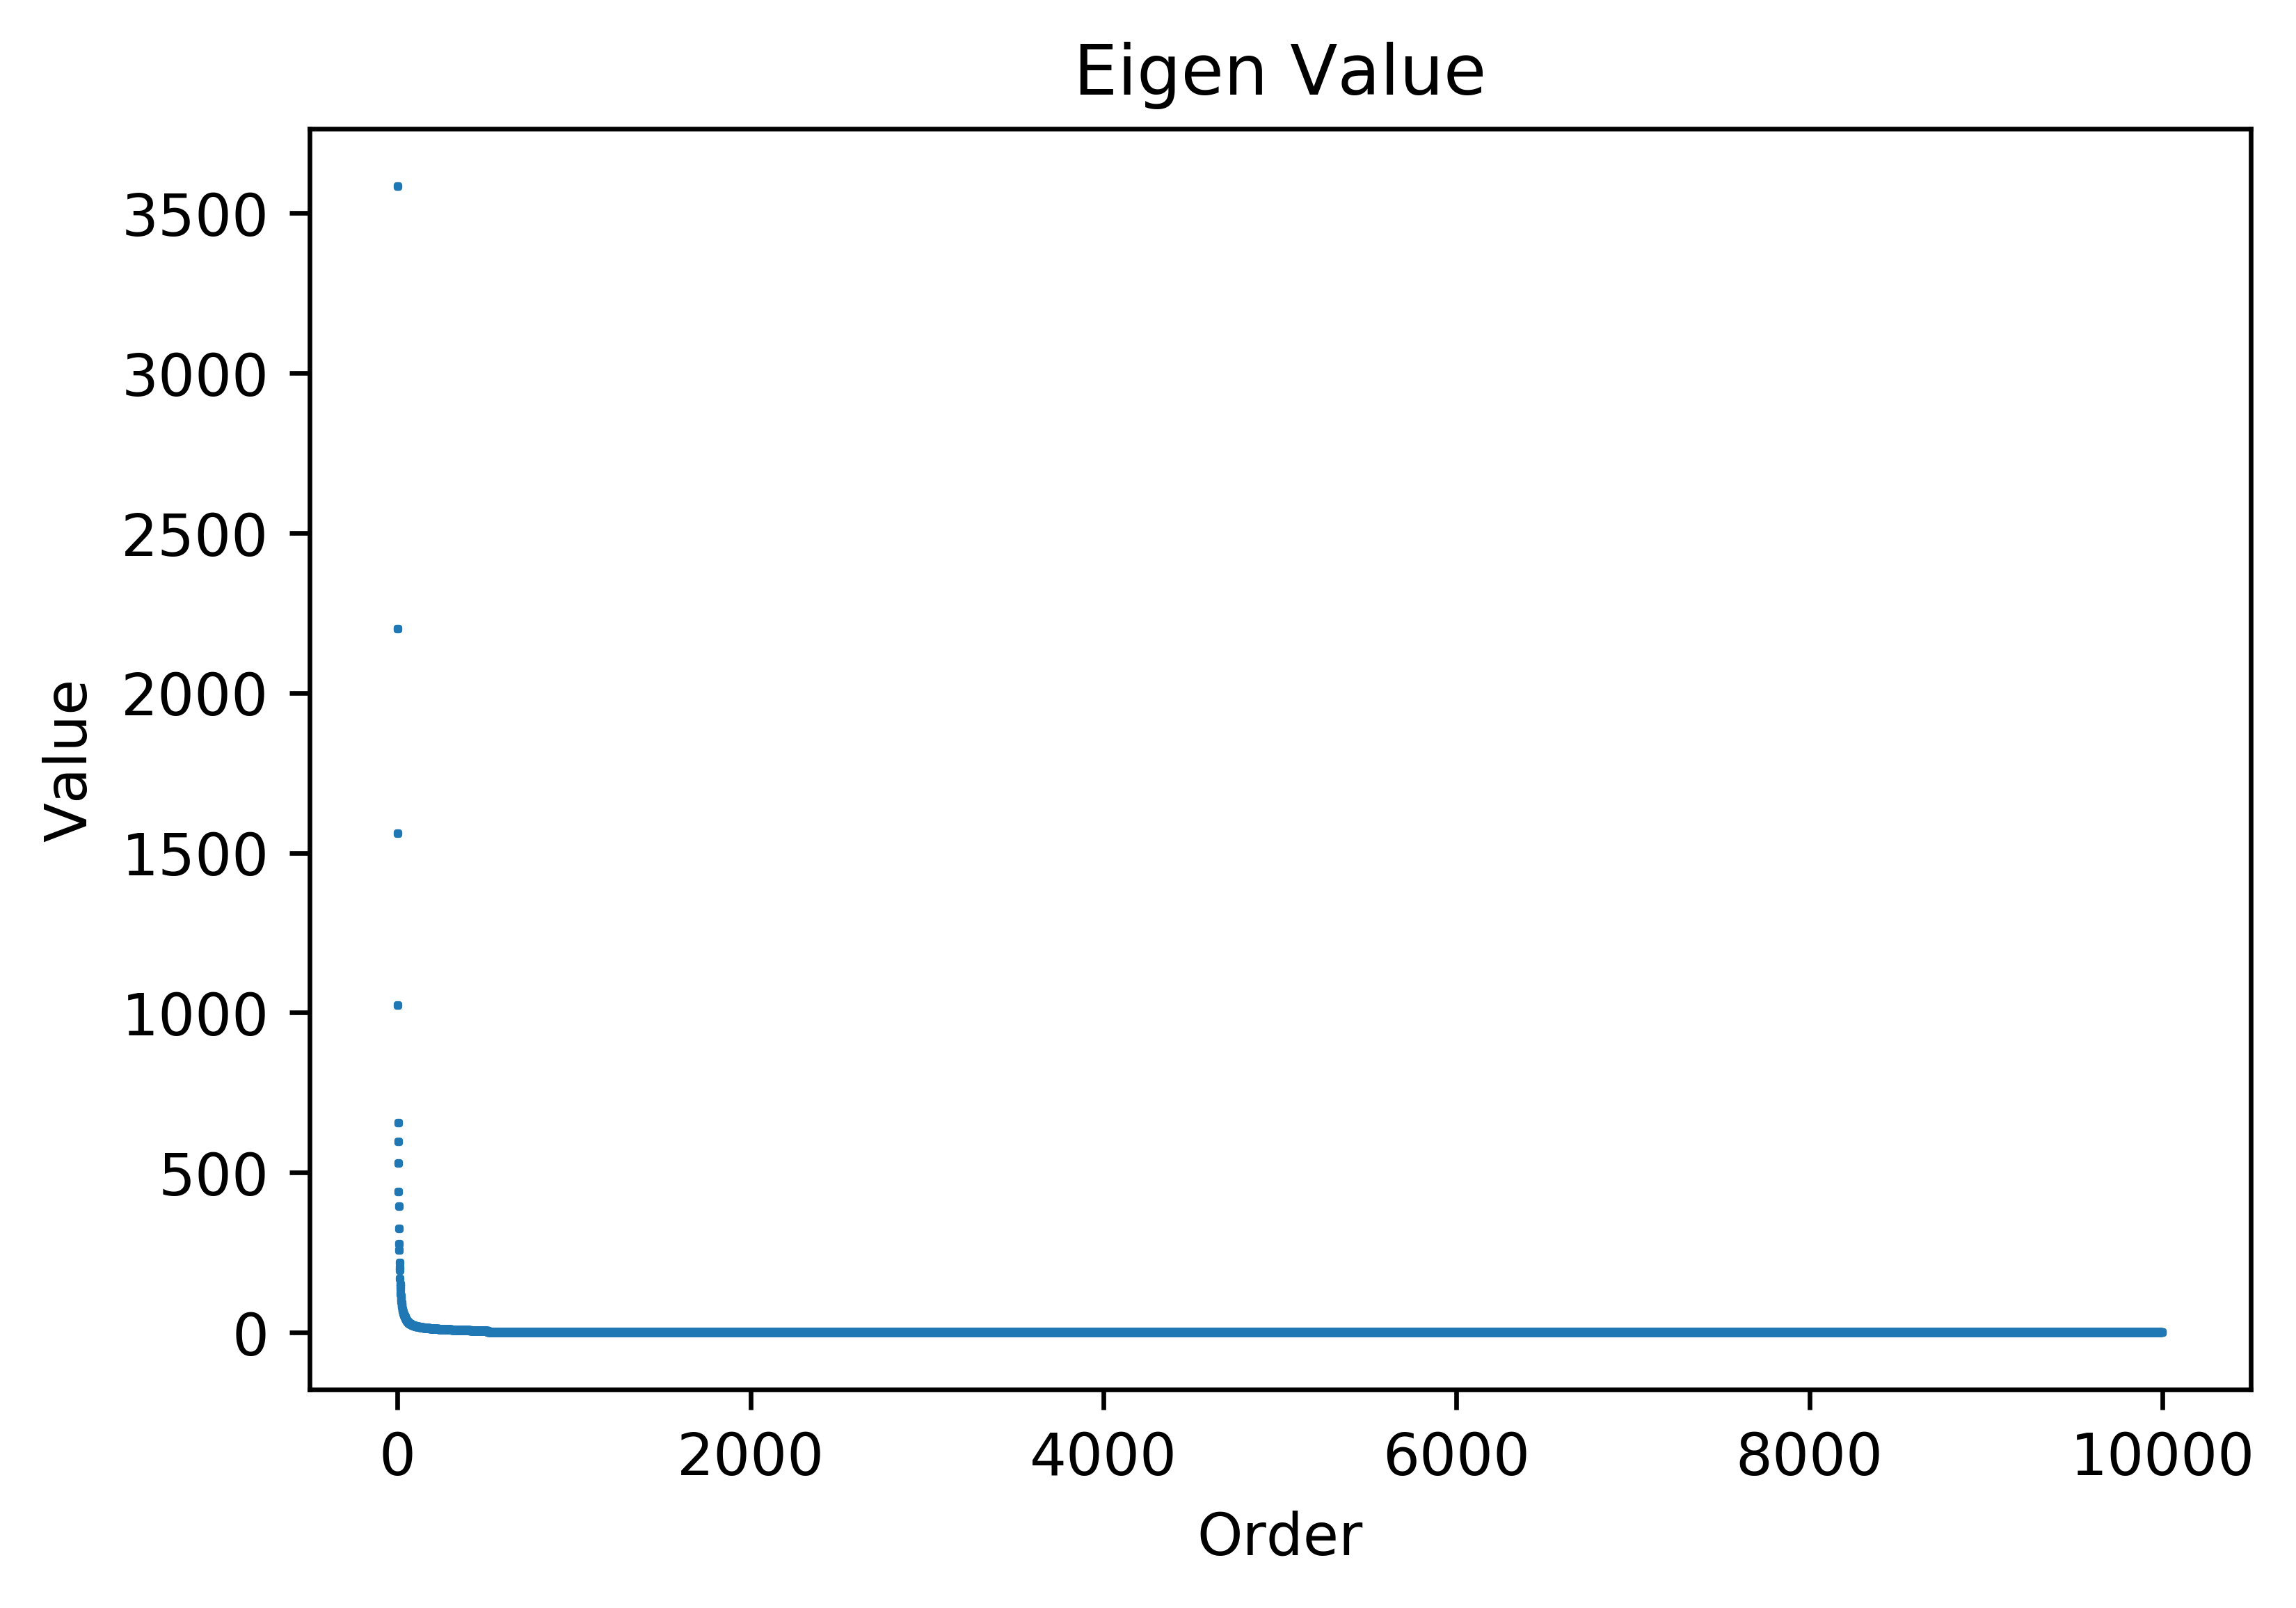

In [34]:
x = np.linspace(1,10000,10000)
fig, ax = plt.subplots(dpi = 600)
ax.set_title("Eigen Value")
ax.set_ylabel("Value")
ax.set_xlabel("Order")
ax.scatter(x, expre_eig_val_list, marker=",", s = 0.3)
fig.savefig("figure/5_eigen_val.png")

# 1c

In [22]:
index = np.argsort(expre_eig_val)
expre_eig_vector = expre_eig_vector[index]

In [23]:
first_component = expre_eig_vector[:,-1]
second_component = expre_eig_vector[:,-2]

In [24]:
expr_two = expr.dot(np.array([first_component, second_component]).T)

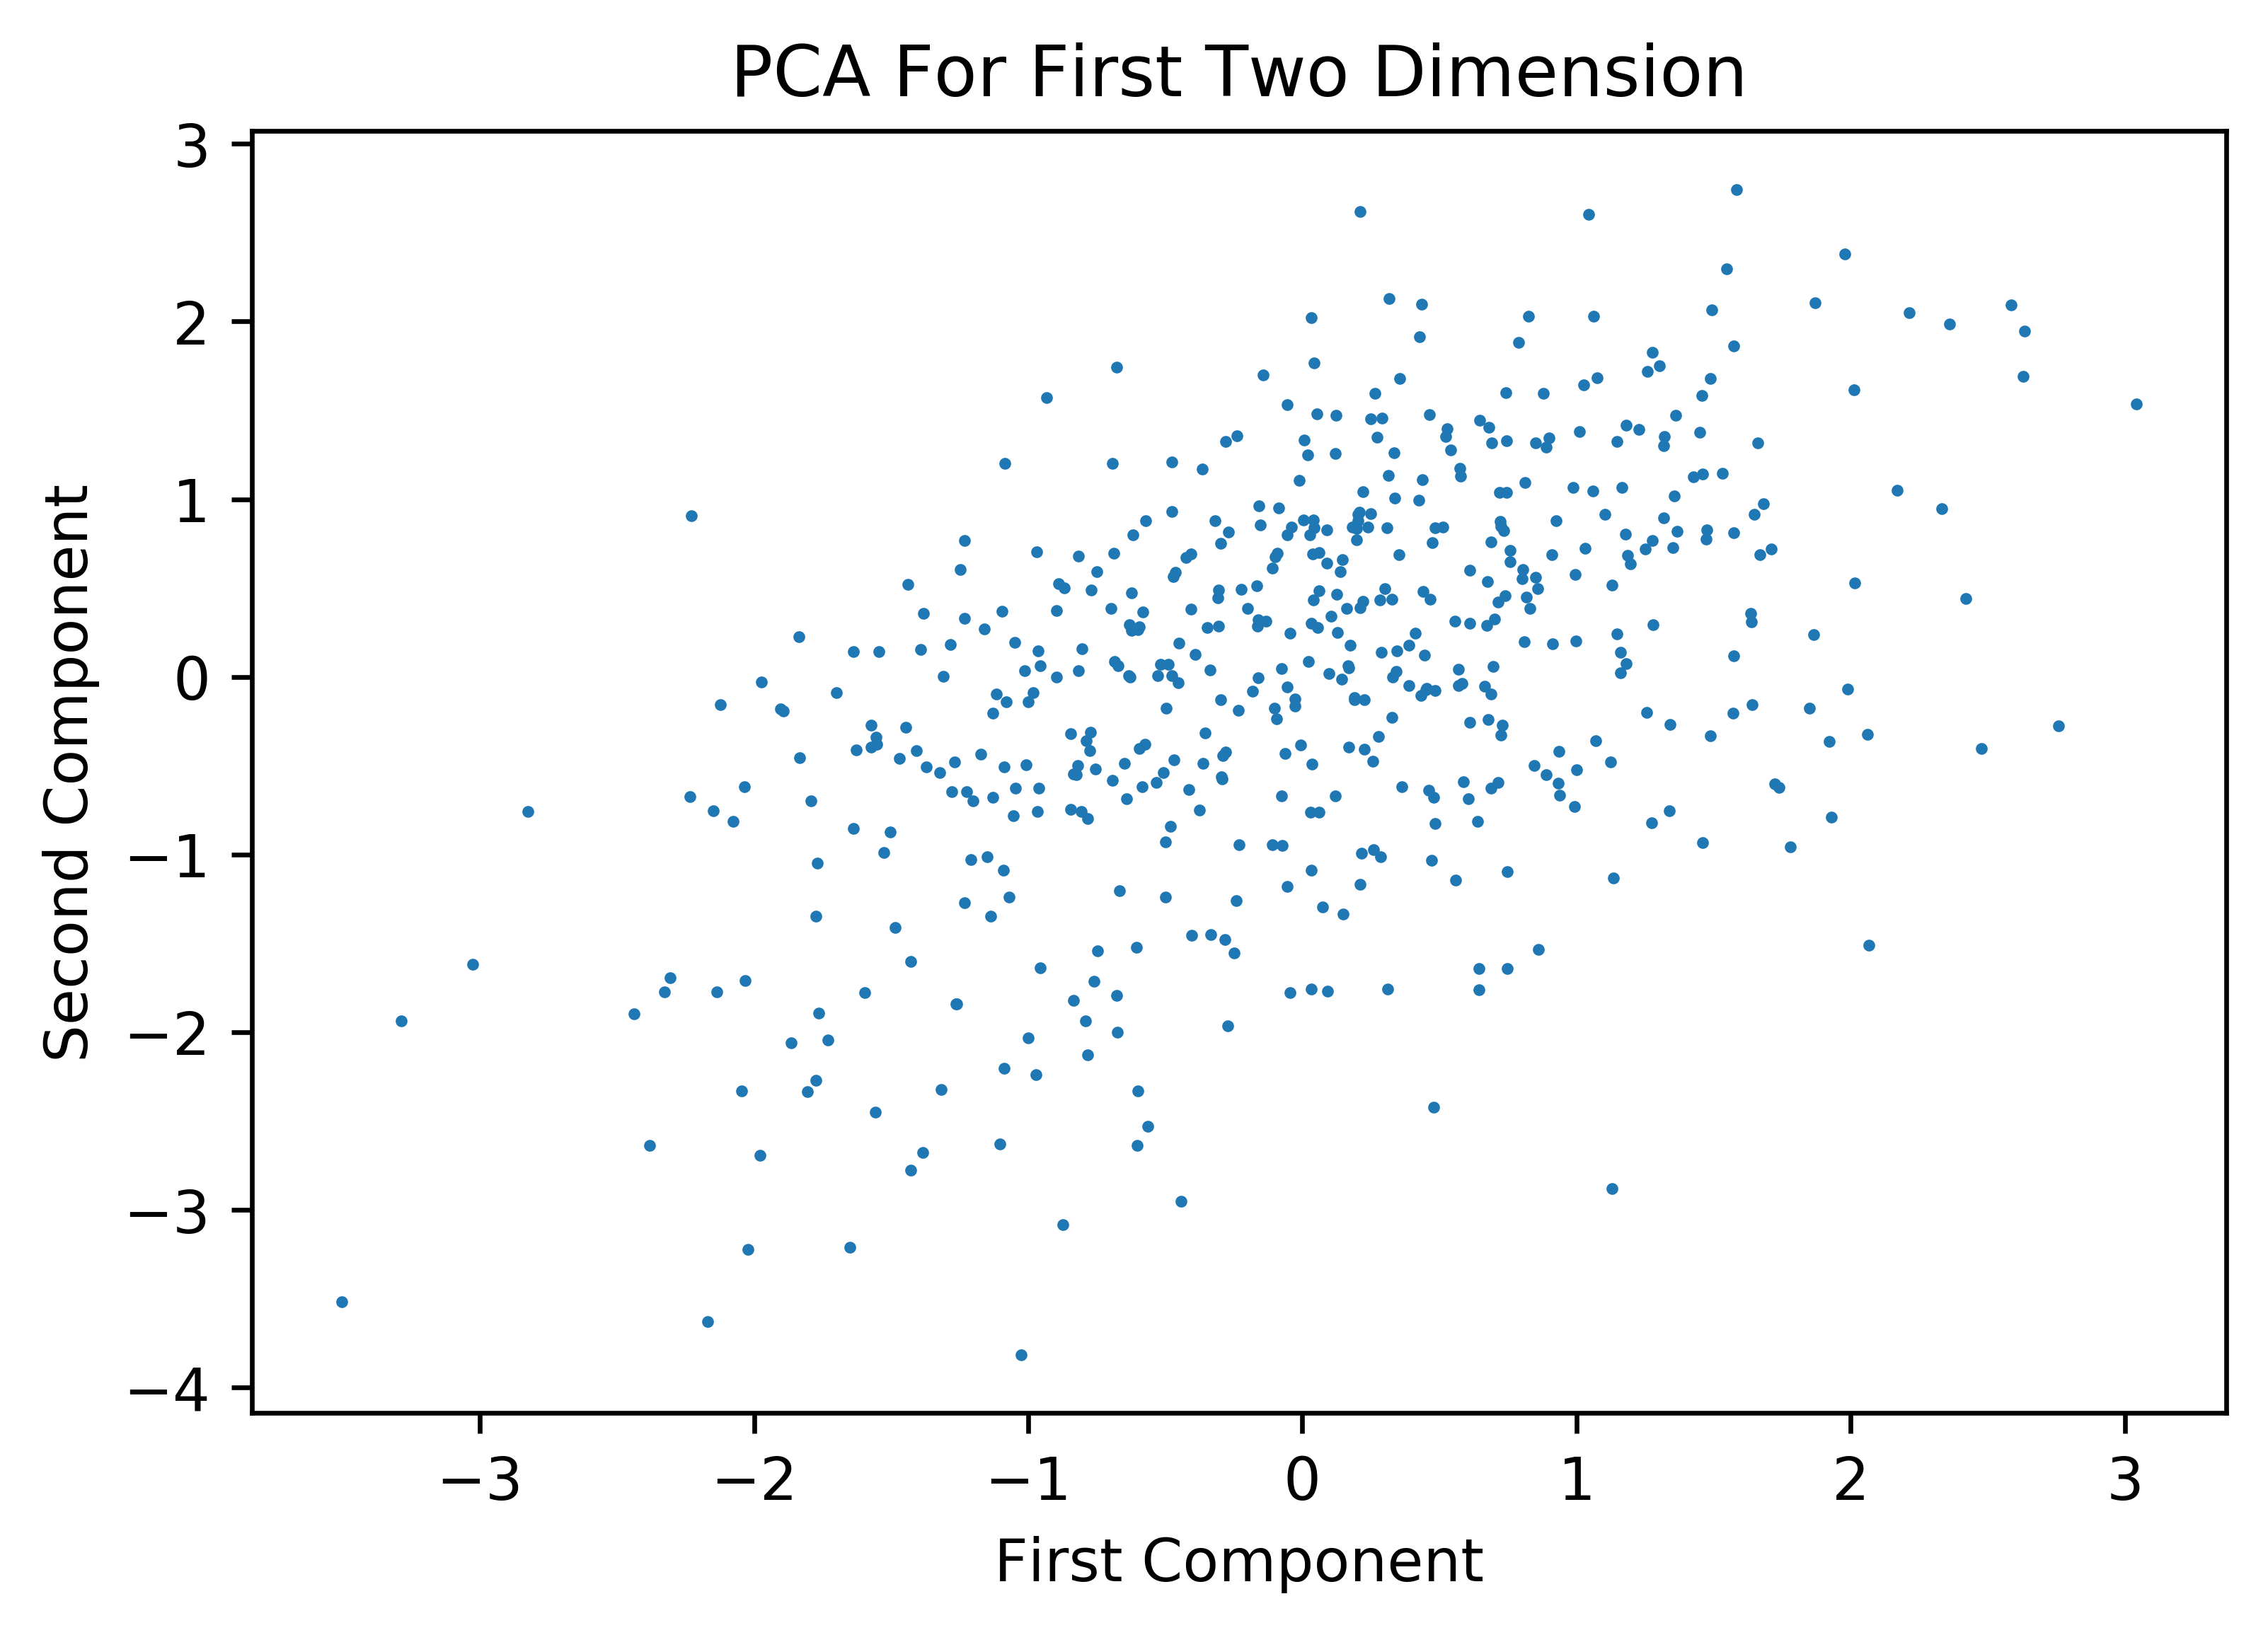

In [27]:
fig, ax =plt.subplots(dpi = 600)
ax.set_title("PCA For First Two Dimension")
ax.set_xlabel("First Component")
ax.set_ylabel("Second Component")
ax.scatter(expr_two[:,0], expr_two[:,1],s = 1)
fig.savefig("figure/5_eigen_projection.png")